
Note: Heart disease and heart failure are not the same. Heart attacks and heart failure are both forms of heart disease. The dataset should be renamed to heart_disease_dataset.



Objective
Produce a decision tree classifier to classify if a person has heart disease or not based on Age, maximum heart rate, cholesterol, and other factors.


Dataset Description
The dataset contains 12 columns.
In this episode we focus on the following columns:

    Age
    Sex (M = Male, F = Female)

    Resting BP (Resting Blood Pressure)

    Cholesterol (Serum Cholesterol)

    FastingBS (Fasting Blood Sugar)

    MaxHR (Maximum Heart Rate)

    ExerciseAngina (Exercise Induced Angina)

    HeartDisease (1 = presence, 0 = non-presence)

Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import seaborn as sns

Importing and exploring our Data

In [3]:
df = pd.read_csv("/content/heart.csv")

# display first few rows of data
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
# dataframe shape
df.shape

(918, 12)

From the above output, we see that our dataset has 918 rows and 12 columns.

It is important we check for any missing values as these can affect our model’s performance:

In [5]:
# check for missing values
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [6]:
# We can look at the statistics of our dataframe

# dataframe statistics
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [7]:
# # age distribution
# ax = sns.displot(data = df, x="Age")


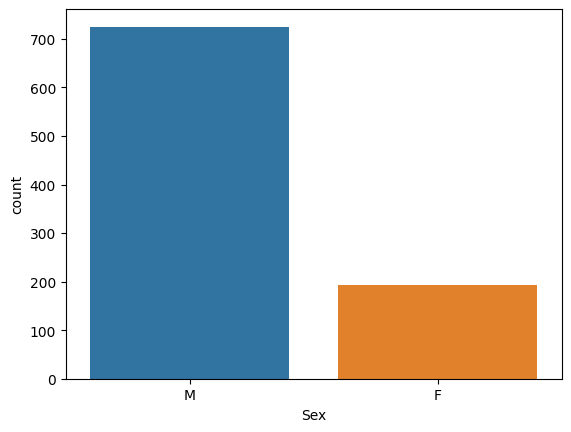

In [8]:

# gender distribution
ax = sns.countplot(data=df, x="Sex",)

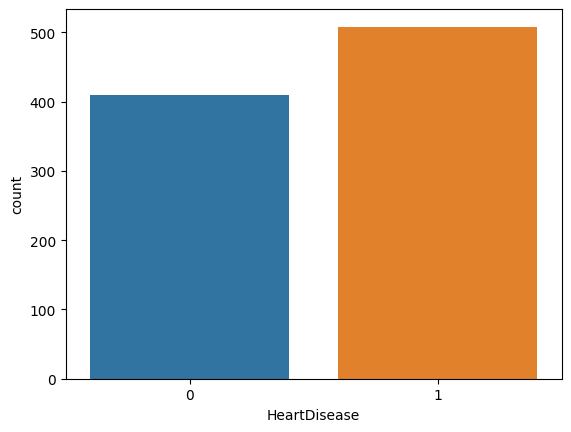

In [9]:
# heart disease (target) distribution
ax = sns.countplot(data=df, x="HeartDisease",)

Data Pre-processing
Before applying our classification algorithm it is important that we prepare our data.

Here we replace our categorical string data, namely Sex and Exercise Angina with numbers:

In [10]:
# label encoding sex
df['Sex'] = df['Sex'].replace(['M','F'],['0','1'])

# label encoding exercise Angina
df['ExerciseAngina'] = df['ExerciseAngina'].replace(['N','Y'],['0','1'])

Splitting the data
Next, we split our data into a training and test set:

In [11]:
from sklearn.model_selection import train_test_split

# define input and target variable
X = df[["Age","Sex","RestingBP", "Cholesterol", "FastingBS", "MaxHR", "ExerciseAngina"]]
y = df.HeartDisease

# splitting test and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 20, random_state=42)

Fitting the Decision Tree Classifier

In [12]:
from sklearn import tree

# define classification algorithm
dt_clf = tree.DecisionTreeClassifier(max_depth = 2, criterion = "entropy")
dt_clf = dt_clf.fit(X_train, y_train)

# generating predictions
y_pred = dt_clf.predict(X_test)

Here we set the max depth equal to 2, so the tree does not go beyond two levels and the criterion to entropy.

Plotting the Decision Tree
We can plot the produced decision tree using the following code. It is important we define the feature and class names. Here the class name is given as:

HD: Heart Disease (1)
NHD: No Heart Disease (0)

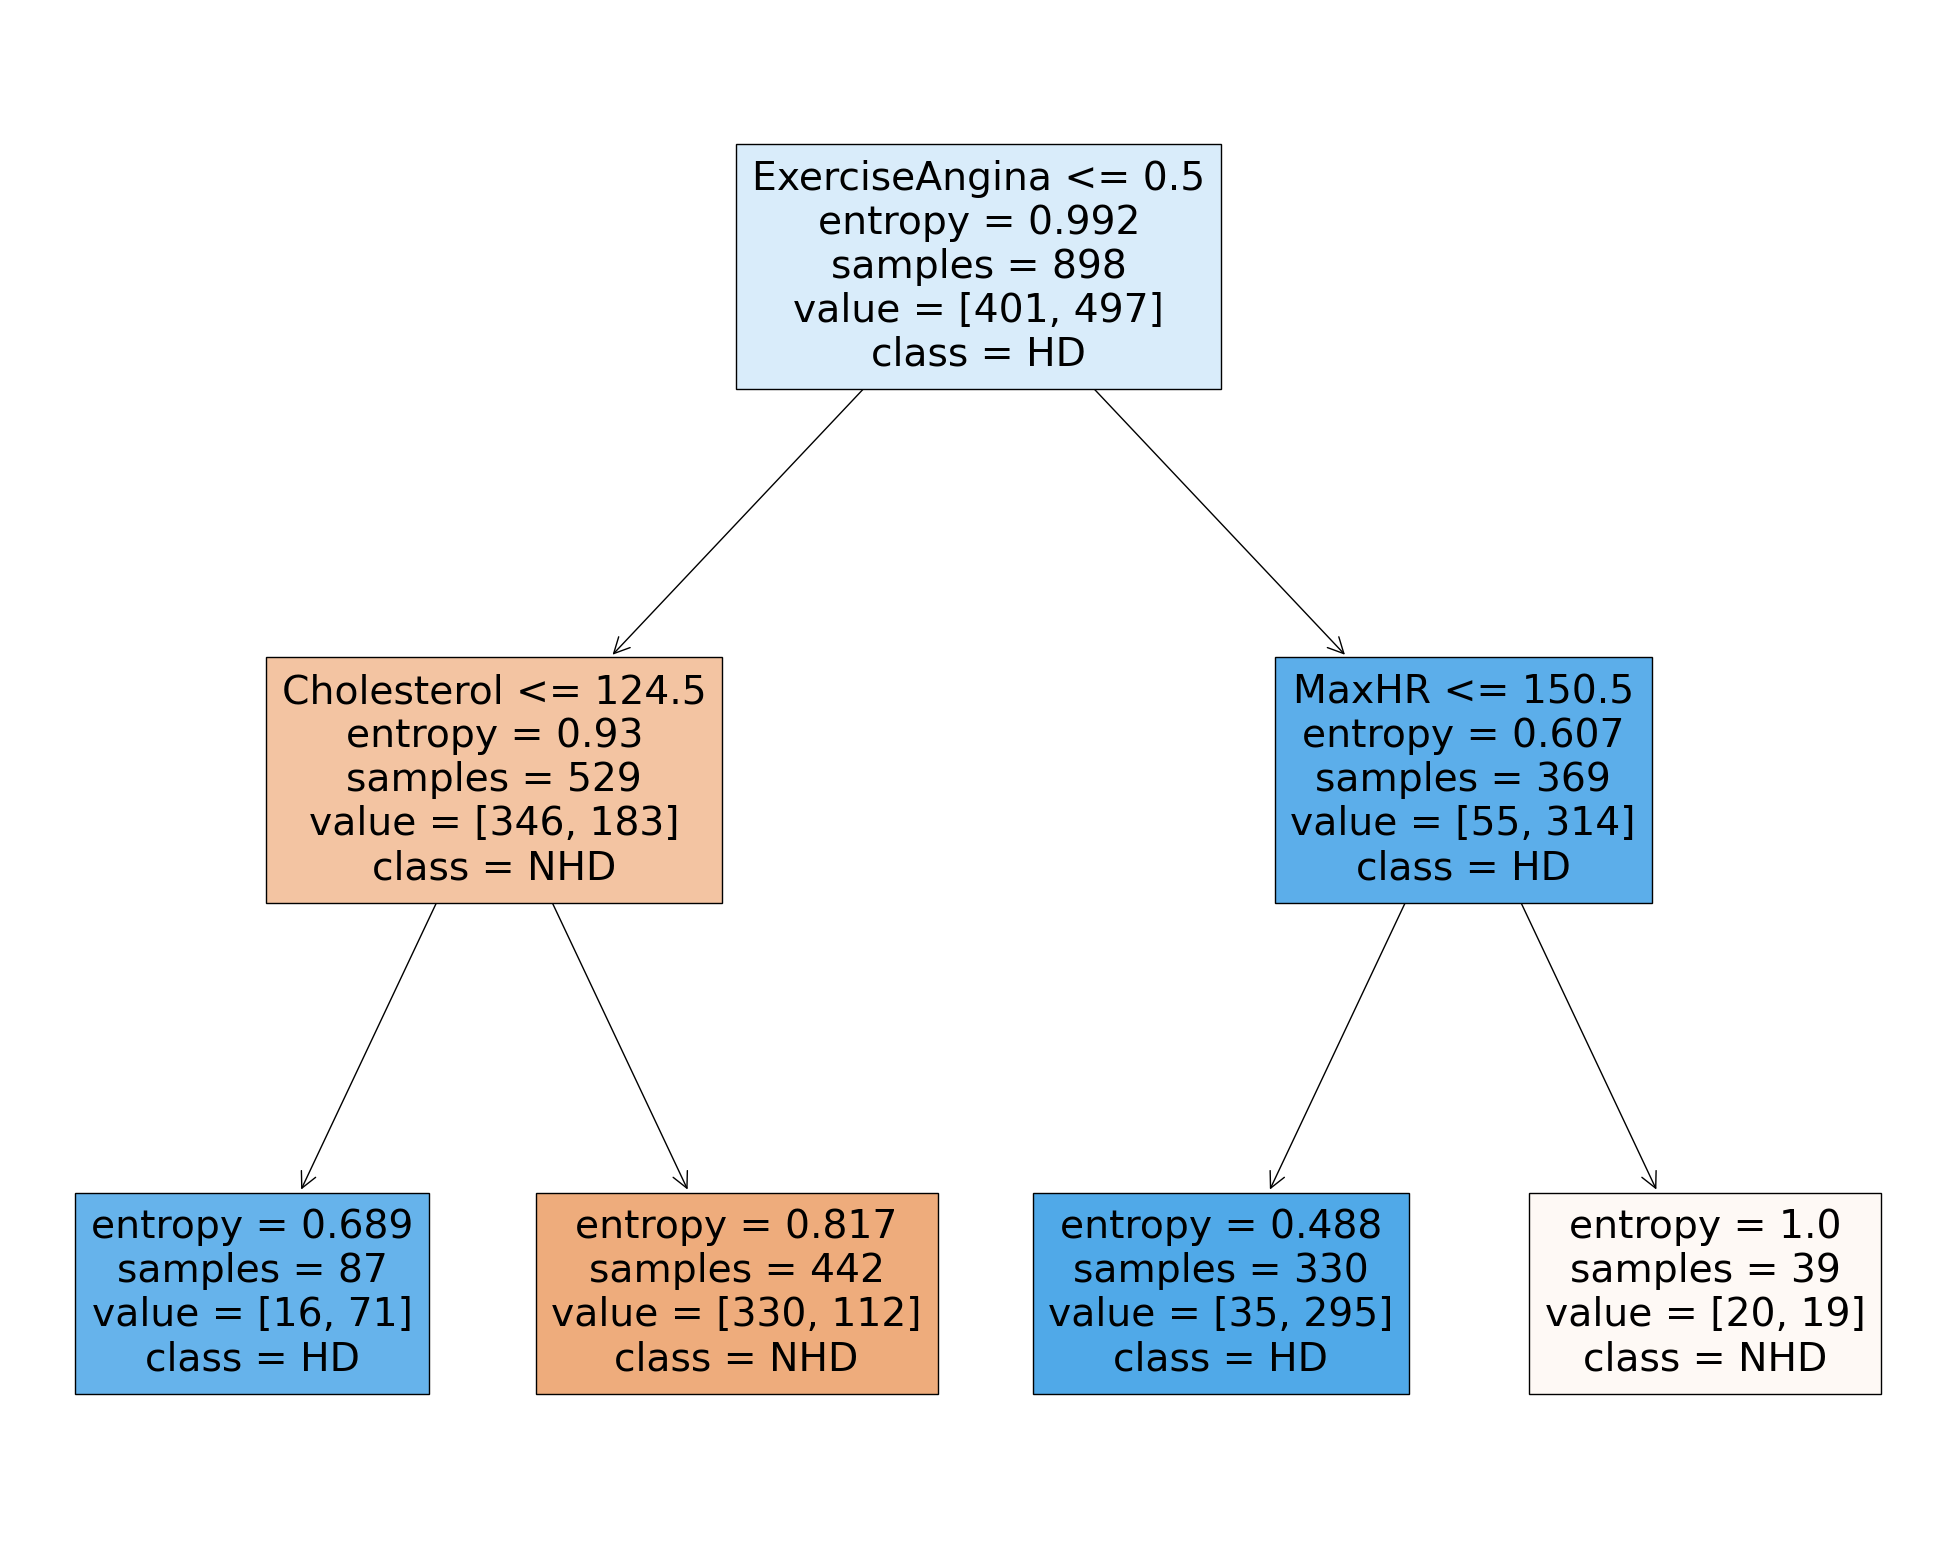

In [13]:
feature_names = ["Age","Sex","RestingBP", "Cholesterol", "FastingBS", "MaxHR", "ExerciseAngina"]
class_names = ["NHD", "HD"]

fig = plt.figure(figsize=(25,20))
plot = tree.plot_tree(dt_clf,
               feature_names=feature_names,
               class_names=class_names,
               filled=True)

Evaluating the Model’s Performance
Now that we built our decision tree classifier we can check its performance.

We can check how many samples are in our test set:

In [14]:
y_test.shape

(20,)

In this case, it is 20.

Accuracy
Since our dataset is quite balanced, that is there are a similar number of people that have and do not have heart disease, we can look at the accuracy metric to evaluate our model.

In [20]:
# accuracy
from sklearn.metrics import accuracy_score , classification_report

accuracy_score(y_test, y_pred)

0.75

In [22]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.64      1.00      0.78         9
           1       1.00      0.55      0.71        11

    accuracy                           0.75        20
   macro avg       0.82      0.77      0.74        20
weighted avg       0.84      0.75      0.74        20



Here we get an accuracy of 0.75.

F1 Score
To get a balance of precision and recall we can use the F1 score.

In [23]:
# f1 score
from sklearn.metrics import f1_score

f1_score(y_test, y_pred)

0.7058823529411764

Here we get an F1 score of around 0.71.

Both model evaluation metrics show relatively good model performance.